# Vesta Topography Analysis

This notebook demonstrates how to analyse the spherical harmonics spectrum of a larger planetary surface dataset. To this end, we use data from the Dawn mission that can be downloaded under 

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pyshtools

To read the dataset, we use the *planetaryimage* module, that can be installed with *pip install planetaryimage*. The .psd datafile itself can be found here: http://dawndata.igpp.ucla.edu/tw.jsp?section=geometry/DTMs/DLR_HAMO_DTM

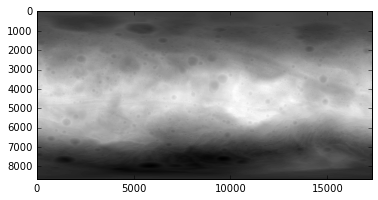

In [4]:
from planetaryimage import PDS3Image
image = PDS3Image.open('global.pds')
plt.imshow(image.image, cmap='gray')

The next step is to run the spherical harmonics expansion. It is important to limit the maximum degree of the expansion, because the input grid has a very high resolution. A full spherical harmonics expansion up to the *nlat/2 - 1* requires a lot of computation time.

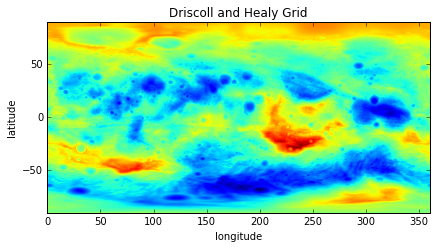

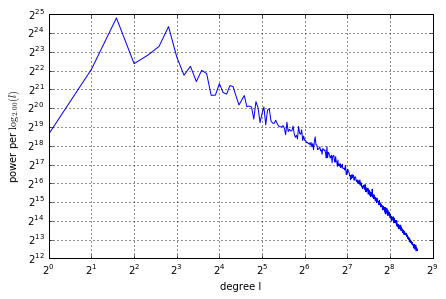

In [5]:
nlat, nlon = image.image.shape[0] - 1, image.image.shape[1] - 1
data = np.copy(image.image[:-1, :-1])
lmax_complete = nlat / 2 - 1

grid = pyshtools.SHGrid.from_array(data, grid='DH')
coeffs = grid.expand(lmax_calc=400)
coeffs.set_coeffs(0, 2, 0)  # we set the ellipticity coefficient to 0
grid = coeffs.expand()
grid.plot_rawdata()
coeffs.plot_powerperband();

we now look at the orientation of the spherical harmonics spectrum

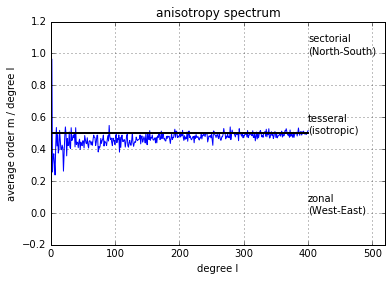

Starting grid search for symmetries.
This can take a while. Reduce lmax to get it faster ...


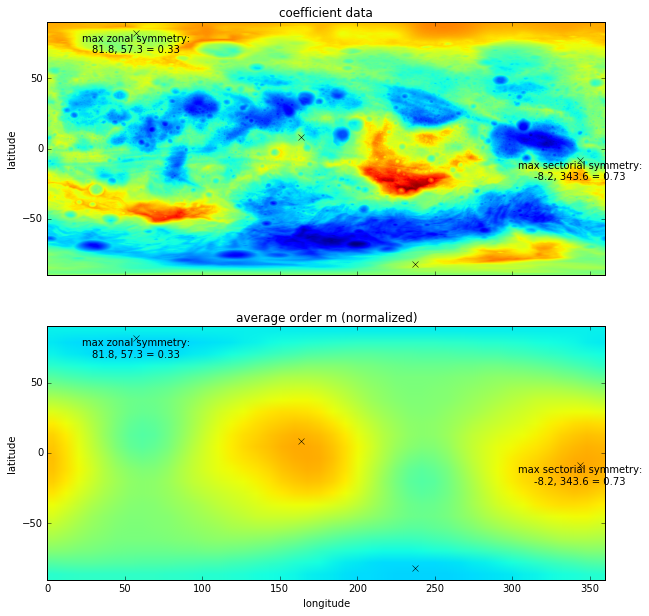

In [6]:
coeffs.plot_anisotropyspectrum()
coeffs.plot_symmetries(lmax=10, with_grid=True);